<a href="https://colab.research.google.com/github/MSimonFRA-UAS/LfDFra-UAS/blob/main/adaline_sol.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Notebook inspired by the exposition in

Raschka, Sebastian, and Vahid Mirjalili. Python machine learning: Machine learning and deep learning with Python, scikit-learn, and TensorFlow 2. Packt Publishing Ltd, 2019.

In [ ]:
%pip install mlxtend --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 15.2 MB/s eta 0:00:00
  Attempting uninstall: mlxtend
    Found existing installation: mlxtend 0.14.0
    Uninstalling mlxtend-0.14.0:
      Successfully uninstalled mlxtend-0.14.0


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions

In [ ]:
class Adaline(object):

    def __init__(self, eta=0.01, epochs=50):
        self.eta = eta
        self.epochs = epochs

    def linear_combination(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0] # use linear activation for training

    def predict(self, X):
        return np.where(self.linear_combination(X) >= 0.0, 1, -1)

    def train(self, X, y):
        # X is the input data matrix
        # y is the output vector corresponding to input X
        self.w_ = np.zeros(X.shape[1] + 1) # hide the bias in the weight vector
        self.cost_ = []

        for _ in range(self.epochs):
            yhat = self.linear_combination(X)
            self.w_[0] += self.eta * (y - yhat).sum() # bias
            self.w_[1:] += self.eta * X.T.dot(y - yhat)
            sos = ((y - yhat)**2).sum() / 2.0
            self.cost_.append(sos)
        return self

In [ ]:
# Load the Iris dataset into a dataframe
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', header=None)
df.head

<bound method NDFrame.head of        0    1    2    3               4
0    5.1  3.5  1.4  0.2     Iris-setosa
1    4.9  3.0  1.4  0.2     Iris-setosa
2    4.7  3.2  1.3  0.2     Iris-setosa
3    4.6  3.1  1.5  0.2     Iris-setosa
4    5.0  3.6  1.4  0.2     Iris-setosa
..   ...  ...  ...  ...             ...
145  6.7  3.0  5.2  2.3  Iris-virginica
146  6.3  2.5  5.0  1.9  Iris-virginica
147  6.5  3.0  5.2  2.0  Iris-virginica
148  6.2  3.4  5.4  2.3  Iris-virginica
149  5.9  3.0  5.1  1.8  Iris-virginica

[150 rows x 5 columns]>

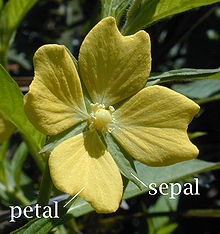 

From English Wikipedia:

Image of a primrose willowherb Ludwigia octovalvis (family Onagraceae), flower showing petals and sepals. Photograph made in Hawai'i by Eric Guinther (Marshman at en.wikipedia) and released under the GNU Free Documentation License.

In [ ]:
# Let's start with a linearly separable example
df = df.sample(frac = 1) # shuffle the data
y = df.iloc[0:100, 4].values
y = np.where(y == 'Iris-setosa', -1, 1)

# Consider the features sepal length and petal length
X = df.iloc[0:100, [0,2]].values

In [ ]:
# Run adaline algorithm without feature standardization
a = Adaline(epochs=20, eta=0.01)
a.train(X, y)
print('Weights: %s' % a.w_)
print('Sum-of-squares errors: %s' % a.cost_)

Weights: [-4.15719911e+31 -2.46799374e+32 -1.64681827e+32]
Sum-of-squares errors: [50.0, 21001.03183682, 49175982.365353815, 115191396957.62375, 269828046881290.12, 6.320539277215415e+17, 1.4805435245357926e+21, 3.4680729474251164e+24, 8.123726029893667e+27, 1.9029278106093508e+31, 4.457479534717756e+34, 1.0441343960423382e+38, 2.4458141164920224e+41, 5.7291539433100836e+44, 1.3420155147858524e+48, 3.1435804653651624e+51, 7.363624364508452e+54, 1.724879142716134e+58, 4.040412587199851e+61, 9.464392878620144e+64]


In [ ]:
# Refine learning rate
a = Adaline(epochs=20, eta=0.0001)
a.train(X, y)
print('Weights: %s' % a.w_)
print('Sum-of-squares errors: %s' % a.cost_)

Weights: [-0.02228649 -0.03992936  0.17505253]
Sum-of-squares errors: [50.0, 42.41524552368199, 39.8139853732365, 38.505420821177445, 37.544103419321274, 36.68754055197997, 35.873241390074504, 35.08481458311787, 34.31768240348118, 33.57030162526723, 32.841915392391606, 32.13197734838551, 31.44000395373752, 30.76553644623255, 30.10813088101658, 29.46735536601997, 28.842789145169487, 28.234022160010714, 27.64065473897819, 27.062297324370714]


In [ ]:
# Standardize features
X_std = np.copy(X)
X_std[:,0] = (X[:,0] - X[:,0].mean()) / X[:,0].std()
X_std[:,1] = (X[:,1] - X[:,1].mean()) / X[:,1].std()

In [ ]:
# Now try with standardized features and larger learning rate
a = Adaline(epochs=20, eta=0.01).train(X_std, y)
print('Weights: %s' % a.w_)
print('Sum-of-squares errors: %s' % a.cost_)


Weights: [ 0.24       -0.31095996  1.11293445]
Sum-of-squares errors: [50.0, 37.37724118440729, 29.873649202402447, 24.094598966416324, 19.64374106927249, 16.215818623260525, 13.575731573208168, 11.542412633929628, 9.976409002061956, 8.770318148507572, 7.841421741484131, 7.126012506401866, 6.575024936882635, 6.150670194341746, 5.8238444046527515, 5.572132602950559, 5.378271429459766, 5.228965142138002, 5.113973743745026, 5.0254106835982295]


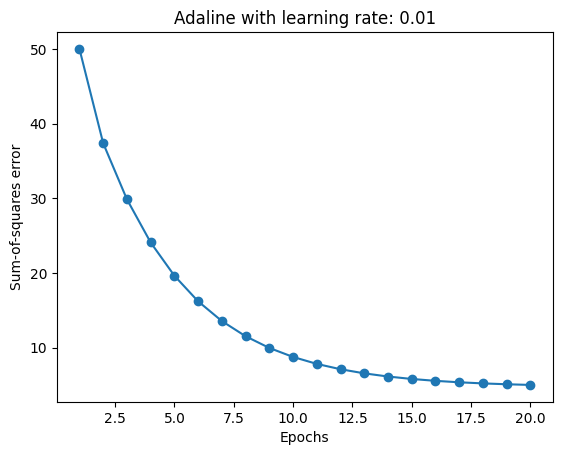

In [ ]:
# Plot sum-of-squares error for convergence analysis
plt.plot(range(1, len(a.cost_)+1), a.cost_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Sum-of-squares error')
plt.title('Adaline with learning rate %s' % a.eta)
plt.show()

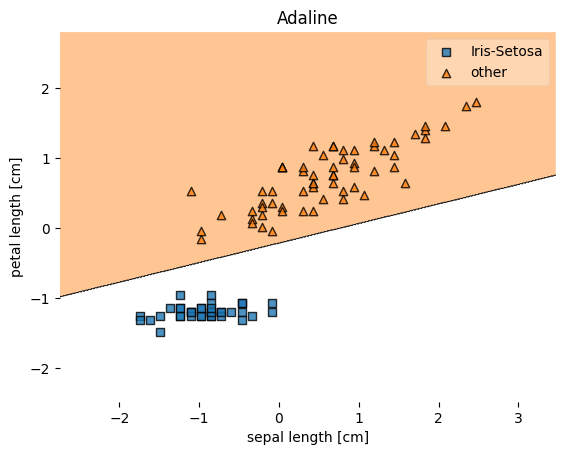

In [ ]:
# Visualize binary classification regions
ax = plot_decision_regions(X_std, y, clf=a)
plt.title('Adaline')
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, 
          ['Iris-Setosa', 'other',], 
           framealpha=0.3, scatterpoints=1)
plt.show()

In [ ]:
# Test generalization
y_test = df.iloc[101:150, 4].values
y_test = np.where(y_test == 'Iris-setosa', -1, 1)

# Consider the features sepal length and petal length
X_test = df.iloc[101:150, [0,2]].values
X_test_std = np.copy(X_test)
X_test_std[:,0] = (X_test[:,0] - X_test[:,0].mean()) / X_test[:,0].std()
X_test_std[:,1] = (X_test[:,1] - X_test[:,1].mean()) / X_test[:,1].std()

In [ ]:
yhat_test = a.predict(X_test_std)
print(np.where(yhat_test-y_test == 0, 'ok', 'missclassified'))

['ok' 'ok' 'ok' 'ok' 'ok' 'ok' 'ok' 'ok' 'ok' 'ok' 'ok' 'ok' 'ok' 'ok'
 'ok' 'ok' 'ok' 'ok' 'ok' 'ok' 'ok' 'ok' 'ok' 'ok' 'ok' 'ok' 'ok' 'ok'
 'ok' 'ok' 'ok' 'ok' 'ok' 'missclassified' 'ok' 'ok' 'ok' 'ok' 'ok' 'ok'
 'ok' 'ok' 'ok' 'ok' 'ok' 'ok' 'ok' 'ok' 'ok']
